# Convolutional Neural Network
In this file, we implement different CNN models to compare it with our Machine Learning and ANN models.

We will run our ANN classification models on two csv files. The 30 seconds csv file containing audio features over for the whole audio, and 3 seconds csv contains audio feature at every 3 seconds intervals. 

In [48]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras import Input


In [49]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [20]:
OUTPUT_DIR = "../"

In [21]:
# Declare constants
IMAGE_HEIGHT = 64  
IMAGE_WIDTH =  64
BATCH_SIZE = 32
# N_channels are basically RGB so we have 3 layer
N_CHANNELS = 3
# N_classes are number of labels we have, in our case we have 10 genres.
N_CLASSES = 10

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             #batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=os.path.join(OUTPUT_DIR, 'data/images_gen'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

Found 999 files belonging to 10 classes.
Using 700 files for training.


In [22]:
# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             #batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=os.path.join(OUTPUT_DIR, 'data/images_gen'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)


Found 999 files belonging to 10 classes.
Using 299 files for validation.


In [23]:
# train_dataset.element_spec[0], valid_dataset.element_spec[0]

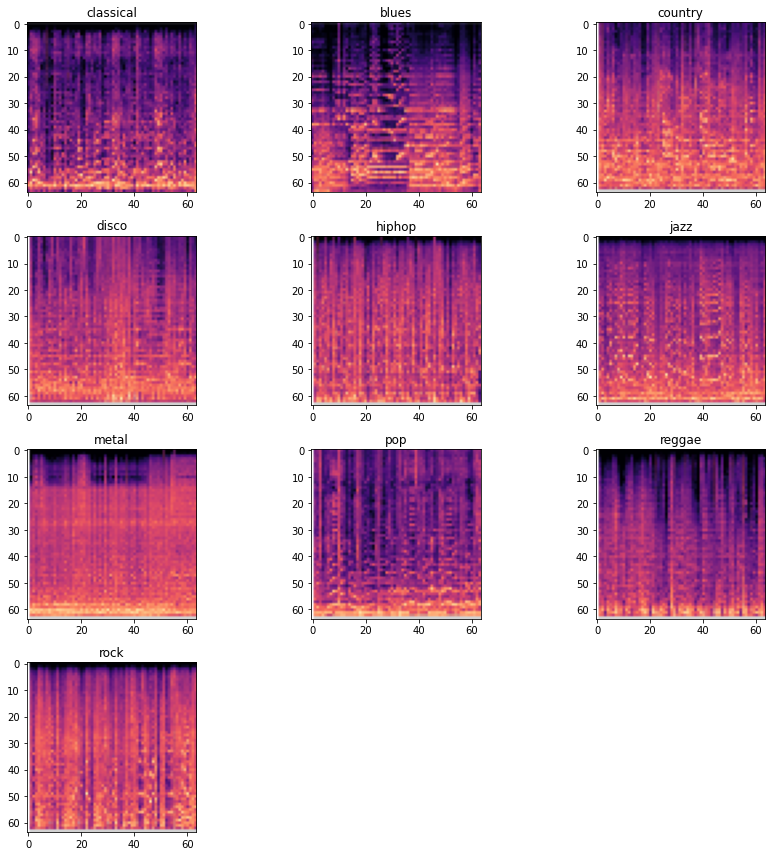

In [27]:
# outputs a 1 graph per label to show what the images we have look like
plt.figure(figsize=(12, 12))
titles = [
    'classical', 'blues', #done
    'country', 'disco', 'hiphop', 
    'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

for images, labels in train_dataset.take(1):
    j=0
    for i in np.unique(labels):
        ind=np.where(labels==i)[0][0]
        ax = plt.subplot(4, 3, j + 1)
        plt.imshow(images[ind].numpy().astype("uint8"))
        plt.title(titles[j])
        plt.axis()
        j+=1
    plt.tight_layout()
    plt.savefig('out.png')#, bbox_inches='tight', pad_inches=0)


In [28]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

In [29]:
model_cnn = keras.Sequential()
model_cnn.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 4), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 4), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))

# output layer
model_cnn.add(keras.layers.Dense(N_CLASSES, activation='softmax'))

In [30]:
# Compile model where we have adam optimizer
model_cnn.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.keras.optimizers.RMSprop(),
    optimizer='adam',
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model_cnn.fit(train_dataset, epochs=100, validation_data=valid_dataset)

Epoch 1/100
22/22 [==============================] - 3s 90ms/step - loss: 1.8041 - accuracy: 0.3600 - val_loss: 2.2378 - val_accuracy: 0.1906
Epoch 2/100
22/22 [==============================] - 2s 77ms/step - loss: 1.0190 - accuracy: 0.6271 - val_loss: 2.3457 - val_accuracy: 0.2441
Epoch 3/100
22/22 [==============================] - 2s 95ms/step - loss: 0.7092 - accuracy: 0.7543 - val_loss: 2.5252 - val_accuracy: 0.2375
Epoch 4/100
22/22 [==============================] - 3s 116ms/step - loss: 0.4601 - accuracy: 0.8729 - val_loss: 2.8645 - val_accuracy: 0.2007
Epoch 5/100
22/22 [==============================] - 3s 125ms/step - loss: 0.3142 - accuracy: 0.9114 - val_loss: 3.2470 - val_accuracy: 0.1706
Epoch 6/100
22/22 [==============================] - 3s 107ms/step - loss: 0.1859 - accuracy: 0.9671 - val_loss: 3.6703 - val_accuracy: 0.1204
Epoch 7/100
22/22 [==============================] - 2s 88ms/step - loss: 0.1088 - accuracy: 0.9857 - val_loss: 3.9907 - val_accuracy: 0.1271
Epo

Epoch 58/100
22/22 [==============================] - 2s 95ms/step - loss: 5.3936e-04 - accuracy: 1.0000 - val_loss: 1.2261 - val_accuracy: 0.6789
Epoch 59/100
22/22 [==============================] - 2s 96ms/step - loss: 4.7068e-04 - accuracy: 1.0000 - val_loss: 1.2305 - val_accuracy: 0.6789
Epoch 60/100
22/22 [==============================] - 2s 100ms/step - loss: 4.5931e-04 - accuracy: 1.0000 - val_loss: 1.2402 - val_accuracy: 0.6823
Epoch 61/100
22/22 [==============================] - 2s 95ms/step - loss: 4.9453e-04 - accuracy: 1.0000 - val_loss: 1.2441 - val_accuracy: 0.6823
Epoch 62/100
22/22 [==============================] - 2s 97ms/step - loss: 4.2571e-04 - accuracy: 1.0000 - val_loss: 1.2426 - val_accuracy: 0.6756
Epoch 63/100
22/22 [==============================] - 2s 95ms/step - loss: 4.6433e-04 - accuracy: 1.0000 - val_loss: 1.2553 - val_accuracy: 0.6856
Epoch 64/100
22/22 [==============================] - 2s 95ms/step - loss: 3.7373e-04 - accuracy: 1.0000 - val_loss: 

In [41]:
len(loss_values)

100

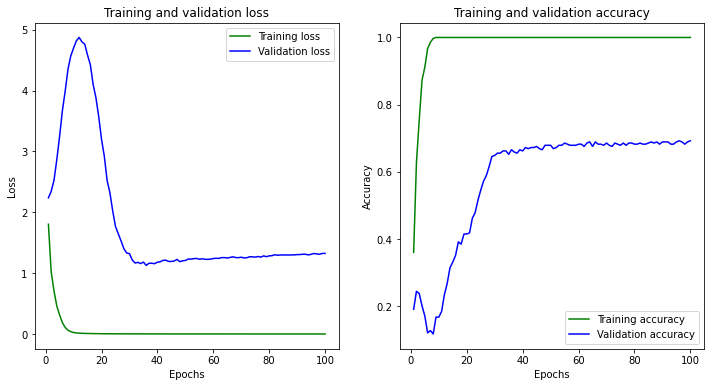

In [45]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot the accuracy curves for training and validation.

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
loss_epochs = range(1, len(acc_values)+1)

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [47]:
final_loss, final_acc = model_cnn.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, Final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 1.324586, Final accuracy: 0.692308
